## Imports

In [7]:
import mne
import numpy as np
import msc
import matplotlib.pyplot as plt

## Load data

In [15]:
# fpath = r'C:\temp\surf30\pat_103002\adm_1030102\rec_103001102\103001102_0113.data'
from msc.data_utils import PicksOptions

raw = msc.data_utils.load_raw_data(picks=PicksOptions.common_channels, crop=100)
raw.info

C:\Users\noam\Repositories\noamsgl\msc\msc\data_utils\load.py:117: RuntimeWarning: Channel(s) ['T7', 'T8', 'P7', 'P8'] could not be picked, because they are not present in the info instance.
  raw = raw.pick(picks).crop(offset, offset + crop).filter(l_freq=LFREQ, h_freq=HFREQ)


<Info | 7 non-empty values
 bads: []
 ch_names: FP1, FP2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2008-07-13 08:07:34 UTC
 nchan: 19
 projs: []
 sfreq: 256.0 Hz
>

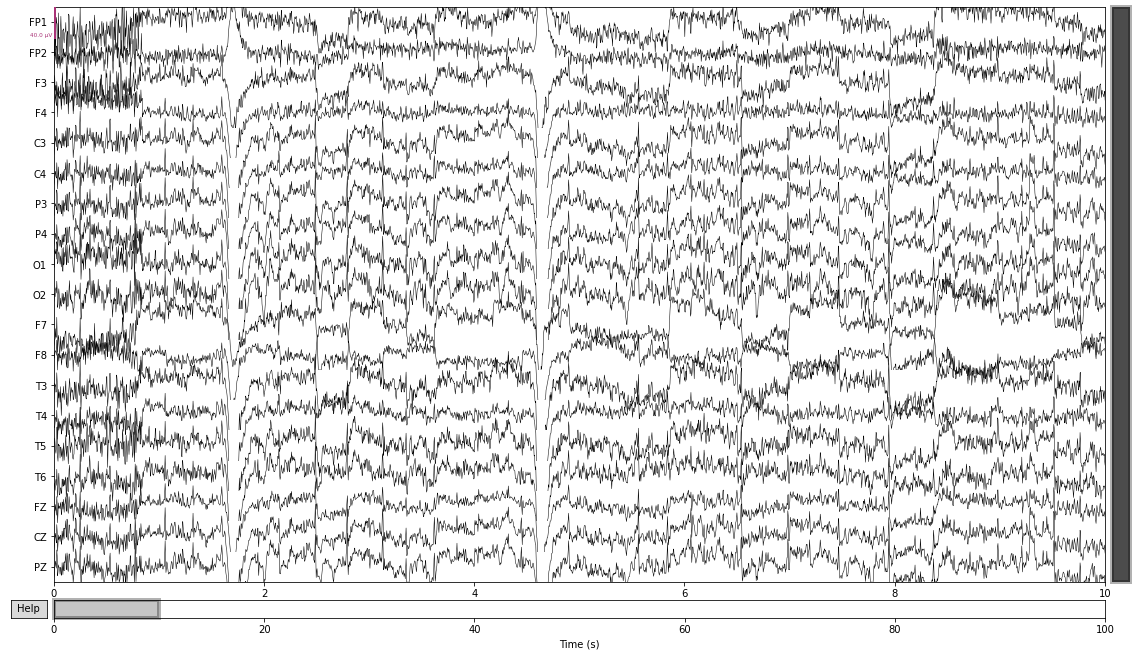

In [16]:
raw.plot();



## Reduce dimensionality
We will be naive and pick a single channel.

In [17]:
data = raw.crop(0, 60).pick_channels(['F4']).get_data()[0]

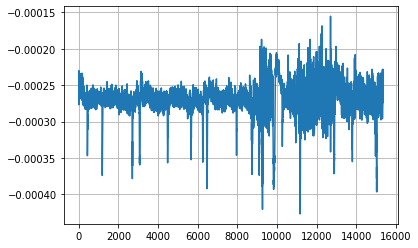

In [18]:
plt.plot(data)
plt.grid(which='both')
plt.show()



## Training and Predicting with Forecasting Model

# Working on this.

for `t` in `timesteps`:
* $f \gets data[:t]$
* $f^* \gets data[t+1]$
* infer parameters $ p(\theta | f) $
* calculate log predictive density $ \log p(f^* \mid f, \theta) $

## Change Point Detection on lpds

main: 100%|██████████| 985/985 [00:00<00:00, 3886.61it/s]


changepoints: [250, 500, 750]


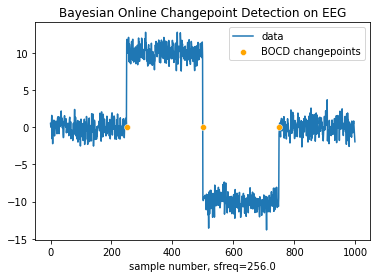

<Figure size 432x288 with 0 Axes>

In [19]:
lpds = msc.bocd.synthetic_data()

changepoints = msc.bocd.get_BOCD_changepoints(lpds)

msc.bocd.plot_BOCD_changepoints(lpds, changepoints, raw.info["sfreq"])